# 1. Acquiring, preprocessing, and analyzing the data

Importing libraries that are necessary for the project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First we load in the data and take a look

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
ionosphere = pd.read_csv(url)
ionosphere.head()

1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b  
1  -0.24180  0.56045  -0.38238  g  
2   1.00000 -0.32382   1.00000  b  
3  -0.59573 -0.04608  -0.65697  g  
4   0.00000 -0.00039   0.12011  b  

[5 rows x 35 columns]

Note that the dataset is continuous.

In the following section the columns are assigned reasonable names for the sake of easily identifying them in the future:

In [3]:
clmns = []
pulse_no1 = 0

for i in range(0, ionosphere.shape[1] - 1):
    
    if (i%2 == 0):
        pulse_no1 = pulse_no1 + 1
        pulse_no2 = 1
    else:
        pulse_no2 = 2
    clmns.append('Pulse ' + str(pulse_no1) + '.' + str(pulse_no2))

clmns.append('Structure detected')

In [4]:
ionosphere.columns = clmns
ionosphere.head()

Pulse 1.1  Pulse 1.2  Pulse 2.1  Pulse 2.2  Pulse 3.1  Pulse 3.2  \
0          1          0    1.00000   -0.18829    0.93035   -0.36156   
1          1          0    1.00000   -0.03365    1.00000    0.00485   
2          1          0    1.00000   -0.45161    1.00000    1.00000   
3          1          0    1.00000   -0.02401    0.94140    0.06531   
4          1          0    0.02337   -0.00592   -0.09924   -0.11949   

   Pulse 4.1  Pulse 4.2  Pulse 5.1  Pulse 5.2  ...  Pulse 13.2  Pulse 14.1  \
0   -0.10868   -0.93597    1.00000   -0.04549  ...    -0.26569    -0.20468   
1    1.00000   -0.12062    0.88965    0.01198  ...    -0.40220     0.58984   
2    0.71216   -1.00000    0.00000    0.00000  ...     0.90695     0.51613   
3    0.92106   -0.23255    0.77152   -0.16399  ...    -0.65158     0.13290   
4   -0.00763   -0.11824    0.14706    0.06637  ...    -0.01535    -0.03240   

   Pulse 14.2  Pulse 15.1  Pulse 15.2  Pulse 16.1  Pulse 16.2  Pulse 17.1  \
0    -0.18401    -0.19040    -0.11593    -0.16626    -0.06288    -0.13738   
1    -0.22145     0.43100    -0.17365     0.60436    -0.24180     0.56045   
2     1.00000     1.00000    -0.20099     0.25682     1.00000    -0.32382   
3    -0.53206     0.02431    -0.62197    -0.05707    -0.59573    -0.04608   
4     0.09223    -0.07859     0.00732     0.00000     0.00000    -0.00039   

   Pulse 17.2  Structure detected  
0    -0.02447                   b  
1    -0.38238                   g  
2     1.00000                   b  
3    -0.65697                   g  
4     0.12011                   b  

[5 rows x 35 columns]

Let's do little bit of processing of different variables that might be interesting to look at. First, we look at the datatype of each column:

In [5]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
Pulse 1.1             350 non-null int64
Pulse 1.2             350 non-null int64
Pulse 2.1             350 non-null float64
Pulse 2.2             350 non-null float64
Pulse 3.1             350 non-null float64
Pulse 3.2             350 non-null float64
Pulse 4.1             350 non-null float64
Pulse 4.2             350 non-null float64
Pulse 5.1             350 non-null float64
Pulse 5.2             350 non-null float64
Pulse 6.1             350 non-null float64
Pulse 6.2             350 non-null float64
Pulse 7.1             350 non-null float64
Pulse 7.2             350 non-null float64
Pulse 8.1             350 non-null float64
Pulse 8.2             350 non-null float64
Pulse 9.1             350 non-null float64
Pulse 9.2             350 non-null float64
Pulse 10.1            350 non-null float64
Pulse 10.2            350 non-null float64
Pulse 11.1            350 non-null floa

Column Pulse 1.1 looks suspiciosly uniform. We check whether all entries of Pulse 1.1 are 1:

In [6]:
ionosphere.isin([1]).sum(axis = 0)[:1] #checking whether all entries of Pulse 1.1 are 1

Pulse 1.1    312
dtype: int64

Not all entries of Pulse 1.1 are 1.  However, column Pulse 1.2 looks suspiciosly uniform as well. We check whether all entries of Pulse 1.2 are 0:

In [7]:
ionosphere.isin([0]).sum(axis = 0)[1:2] #checking whether all entries of Pulse 1.2 are 0

Pulse 1.2    350
dtype: int64

We see that column Pulse 1.2 is constant and can be dropped:

In [8]:
ionosphere = ionosphere.drop(['Pulse 1.2'], axis = 1)
ionosphere

Pulse 1.1  Pulse 2.1  Pulse 2.2  Pulse 3.1  Pulse 3.2  Pulse 4.1  \
0            1    1.00000   -0.18829    0.93035   -0.36156   -0.10868   
1            1    1.00000   -0.03365    1.00000    0.00485    1.00000   
2            1    1.00000   -0.45161    1.00000    1.00000    0.71216   
3            1    1.00000   -0.02401    0.94140    0.06531    0.92106   
4            1    0.02337   -0.00592   -0.09924   -0.11949   -0.00763   
..         ...        ...        ...        ...        ...        ...   
345          1    0.83508    0.08298    0.73739   -0.14706    0.84349   
346          1    0.95113    0.00419    0.95183   -0.02723    0.93438   
347          1    0.94701   -0.00034    0.93207   -0.03227    0.95177   
348          1    0.90608   -0.01657    0.98122   -0.01989    0.95691   
349          1    0.84710    0.13533    0.73638   -0.06151    0.87873   

     Pulse 4.2  Pulse 5.1  Pulse 5.2  Pulse 6.1  ...  Pulse 13.2  Pulse 14.1  \
0     -0.93597    1.00000   -0.04549    0.50874  ...    -0.26569    -0.20468   
1     -0.12062    0.88965    0.01198    0.73082  ...    -0.40220     0.58984   
2     -1.00000    0.00000    0.00000    0.00000  ...     0.90695     0.51613   
3     -0.23255    0.77152   -0.16399    0.52798  ...    -0.65158     0.13290   
4     -0.11824    0.14706    0.06637    0.03786  ...    -0.01535    -0.03240   
..         ...        ...        ...        ...  ...         ...         ...   
345   -0.05567    0.90441   -0.04622    0.89391  ...    -0.04202     0.83479   
346   -0.01920    0.94590    0.01606    0.96510  ...     0.01361     0.93522   
347   -0.03431    0.95584    0.02446    0.94124  ...     0.03193     0.92489   
348   -0.03646    0.85746    0.00110    0.89724  ...    -0.02099     0.89147   
349    0.08260    0.88928   -0.09139    0.78735  ...    -0.15114     0.81147   

     Pulse 14.2  Pulse 15.1  Pulse 15.2  Pulse 16.1  Pulse 16.2  Pulse 17.1  \
0      -0.18401    -0.19040    -0.11593    -0.16626    -0.06288    -0.13738   
1      -0.22145     0.43100    -0.17365     0.60436    -0.24180     0.56045   
2       1.00000     1.00000    -0.20099     0.25682     1.00000    -0.32382   
3      -0.53206     0.02431    -0.62197    -0.05707    -0.59573    -0.04608   
4       0.09223    -0.07859     0.00732     0.00000     0.00000    -0.00039   
..          ...         ...         ...         ...         ...         ...   
345     0.00123     1.00000     0.12815     0.86660    -0.10714     0.90546   
346     0.04925     0.93159     0.08168     0.94066    -0.00035     0.91483   
347     0.02542     0.92120     0.02242     0.92459     0.00442     0.92697   
348    -0.07760     0.82983    -0.17238     0.96022    -0.03757     0.87403   
349    -0.04822     0.78207    -0.00703     0.75747    -0.06678     0.85764   

     Pulse 17.2  Structure detected  
0      -0.02447                   b  
1      -0.38238                   g  
2       1.00000                   b  
3      -0.65697                   g  
4       0.12011                   b  
..          ...                 ...  
345    -0.04307                   g  
346     0.04712                   g  
347    -0.00577                   g  
348    -0.16243                   g  
349    -0.06151                   g  

[350 rows x 34 columns]

Just in case, the datatype inconsistensy is analyzed in a different way as well:

In [9]:
# Detecting dtype inconsistency
print('Columns with data type inconsistensy:')
n_weird_columns = 0
for col in ionosphere.columns:
    weird = (ionosphere[[col]].applymap(type) != ionosphere[[col]].iloc[0].apply(type)).any(axis=1)
    if len(ionosphere[weird]) > 0:
        print(col)
        n_weird_columns = n_weird_columns + 1
if (n_weird_columns == 0):
    print('None')

Columns with data type inconsistensy:
None


The last column has the 'object' type. It is transformed into numerical values with 0 corresponding to 'b' and 1 corresponding to 'g' as follows:

In [10]:
for i in range(len(ionosphere['Structure detected'])):
    y_i = ionosphere['Structure detected'][i]
    if (y_i == 'b'):
        ionosphere['Structure detected'][i] = 0
    elif (y_i == 'g'):
        ionosphere['Structure detected'][i] = 1

ionosphere = ionosphere.astype({'Structure detected': 'int64'})
ionosphere.head()

/Users/Nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pulse 1.1  Pulse 2.1  Pulse 2.2  Pulse 3.1  Pulse 3.2  Pulse 4.1  \
0          1    1.00000   -0.18829    0.93035   -0.36156   -0.10868   
1          1    1.00000   -0.03365    1.00000    0.00485    1.00000   
2          1    1.00000   -0.45161    1.00000    1.00000    0.71216   
3          1    1.00000   -0.02401    0.94140    0.06531    0.92106   
4          1    0.02337   -0.00592   -0.09924   -0.11949   -0.00763   

   Pulse 4.2  Pulse 5.1  Pulse 5.2  Pulse 6.1  ...  Pulse 13.2  Pulse 14.1  \
0   -0.93597    1.00000   -0.04549    0.50874  ...    -0.26569    -0.20468   
1   -0.12062    0.88965    0.01198    0.73082  ...    -0.40220     0.58984   
2   -1.00000    0.00000    0.00000    0.00000  ...     0.90695     0.51613   
3   -0.23255    0.77152   -0.16399    0.52798  ...    -0.65158     0.13290   
4   -0.11824    0.14706    0.06637    0.03786  ...    -0.01535    -0.03240   

   Pulse 14.2  Pulse 15.1  Pulse 15.2  Pulse 16.1  Pulse 16.2  Pulse 17.1  \
0    -0.18401    -0.19040    -0.11593    -0.16626    -0.06288    -0.13738   
1    -0.22145     0.43100    -0.17365     0.60436    -0.24180     0.56045   
2     1.00000     1.00000    -0.20099     0.25682     1.00000    -0.32382   
3    -0.53206     0.02431    -0.62197    -0.05707    -0.59573    -0.04608   
4     0.09223    -0.07859     0.00732     0.00000     0.00000    -0.00039   

   Pulse 17.2  Structure detected  
0    -0.02447                   0  
1    -0.38238                   1  
2     1.00000                   0  
3    -0.65697                   1  
4     0.12011                   0  

[5 rows x 34 columns]

In [11]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 34 columns):
Pulse 1.1             350 non-null int64
Pulse 2.1             350 non-null float64
Pulse 2.2             350 non-null float64
Pulse 3.1             350 non-null float64
Pulse 3.2             350 non-null float64
Pulse 4.1             350 non-null float64
Pulse 4.2             350 non-null float64
Pulse 5.1             350 non-null float64
Pulse 5.2             350 non-null float64
Pulse 6.1             350 non-null float64
Pulse 6.2             350 non-null float64
Pulse 7.1             350 non-null float64
Pulse 7.2             350 non-null float64
Pulse 8.1             350 non-null float64
Pulse 8.2             350 non-null float64
Pulse 9.1             350 non-null float64
Pulse 9.2             350 non-null float64
Pulse 10.1            350 non-null float64
Pulse 10.2            350 non-null float64
Pulse 11.1            350 non-null float64
Pulse 11.2            350 non-null fl

Splitting the data into the test and train datasets:

In [12]:
msk = np.random.rand(len(ionosphere)) < 0.8
train = ionosphere[msk]
test = ionosphere[~msk]
print('Train entries: ' + str(len(train)))
print('Test entries: ' + str(len(test)))

Train entries: 268
Test entries: 82


Checking how much of the train data are good and bad:

In [13]:
X_train = train.iloc[:, :-1] # feature values
y_train = train.iloc[:, -1] # target values

print('Number of good entries: ' + str(train.loc[y_train == 1].shape[0]))
print('Number of bad entries: ' + str(train.loc[y_train == 0].shape[0]))

Number of good entries: 173
Number of bad entries: 95


We can take a look at the prior probability of 'good' entries:

In [14]:
prior = train.loc[y_train == 1].shape[0] / (train.loc[y_train == 1].shape[0] + train.loc[y_train == 0].shape[0])
prior

0.6455223880597015

We can plot some data to see potential dependencies. In this section dependencies between Pulses i.1 and i.2 are plotted for $i = 2, 3, ..., 17$ ($i=1$ is obscluded since Pulse 1.2 is constant and dropped).

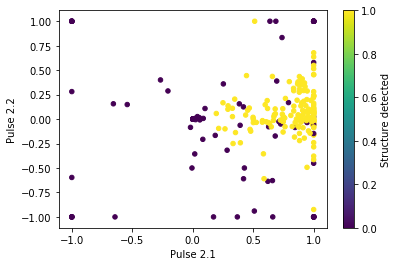

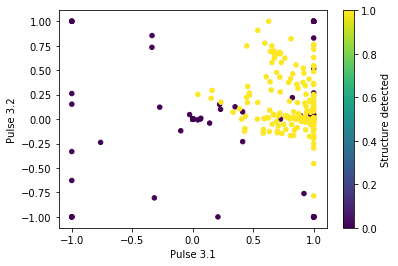

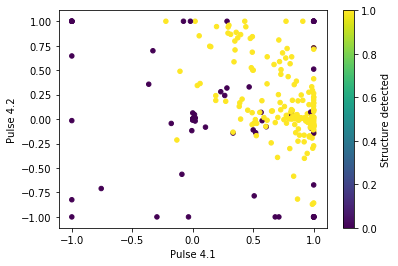

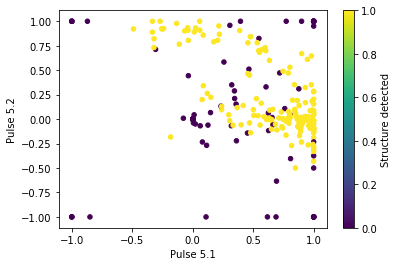

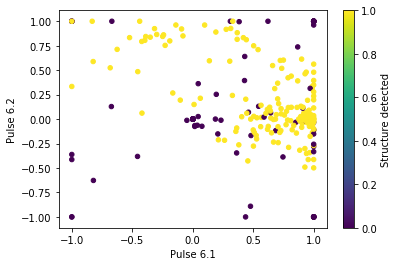

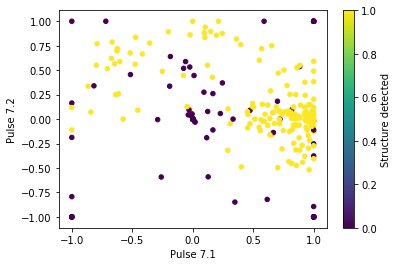

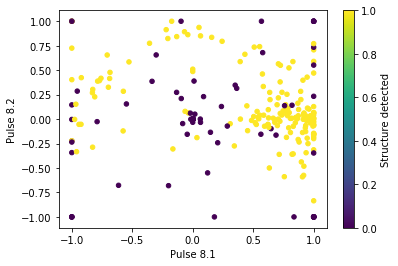

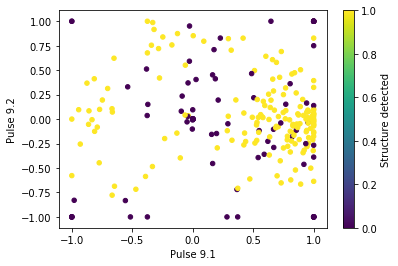

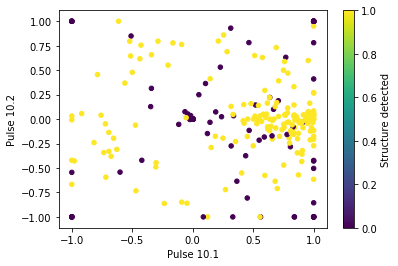

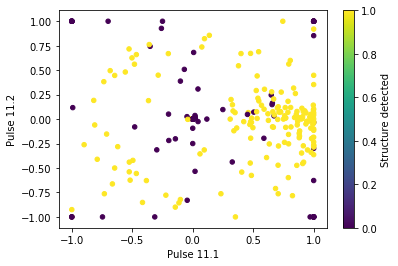

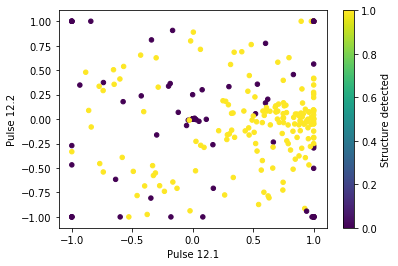

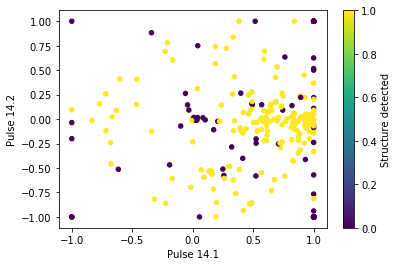

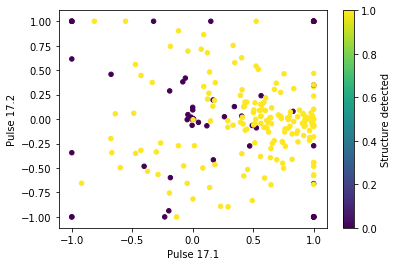

In [15]:
pulse_no1 = 2 # the Pulse we start with

for i in range(1, train.shape[1] - 1):
    
    if (i%2 == 0):
        pulse_no1 = pulse_no1 + 1
        pulse_no2 = 1
    else:
        pulse_no2 = 2
        xlabel = 'Pulse ' + str(pulse_no1) + '.' + str(1)
        ylabel = 'Pulse ' + str(pulse_no1) + '.' + str(2)
        
        fig, ax = plt.subplots()
        ax2 = train.plot.scatter(x=xlabel, y=ylabel, c = 'Structure detected', colormap='viridis', ax = ax)
    #clmns.append('Pulse ' + str(pulse_no1) + '.' + str(pulse_no2))


#plt.show()
#ionosphere.reset_index().plot(x="Pulse 2.1", y='Pulse 2.2', c = 'Structure detected', ax = (0, 0), colormap='viridis', kind = 'scatter')
#ionosphere.reset_index().plot(x="Pulse 3.1", y='Pulse 3.2', c = 'Structure detected', ax = (0, 1), colormap='viridis', kind = 'scatter')
#ionosphere.diff().plot(ax=axes[r,c]).scatter(x='Pulse 2.1', y='Pulse 2.2', c = 'Structure detected', colormap='viridis')
    
#ax1 = ionosphere.diff().plot.scatter(x='Pulse 2.1', y='Pulse 2.2', c = 'Structure detected', colormap='viridis')

# 2. Implementing the models

## 2.1. Implementing logistic regression

A class for logistic regression with gradient descent:

In [99]:
class Logistic_Regression:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 eps = 1e-2, # termination condition of the gradient descent method
                ):
        self.lr = lr
        self.eps = eps
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          eps # termination condition is used if n_iterations == 0
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n_iterations = 0 # just for counting the number of iterations
        while (np.linalg.norm(g) > eps):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n_iterations += 1

        print('Number of iterations of the gradient descent:', n_iterations)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.eps)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Essentially the same class but instead of the termiantion condition $\epsilon$ the number of iterations $n_{iterations}$ is used

In [100]:
class Logistic_Regression_Iter:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 n_iterations = 1e-2, # number of iterations of the gradient descent method
                ):
        self.lr = lr
        self.n_iterations = n_iterations
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          n_iterations # termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n = 0 # just for counting the number of iterations
        while (n_iterations > n):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n += 1

        #print('Number of iterations of the gradient descent:', n)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.n_iterations)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Setting up the logistic regression:

In [88]:
LR = Logistic_Regression()

Running the fit function:

In [89]:
%time w = LR.fit(X_train, y_train)
w

Number of iterations of the gradient descent: 41583
CPU times: user 18.5 s, sys: 44.3 ms, total: 18.5 s
Wall time: 18.5 s


array([-4.06439842,  1.85665146,  2.09615676,  1.39412827,  1.63481404,
        2.48232199,  0.67237681,  1.53129346,  1.05896664,  0.48403001,
       -1.94097243, -1.20400704, -0.1801467 ,  1.70692342,  1.03536945,
        0.74272882,  1.01174655, -0.78818122, -0.45457011, -0.3908486 ,
        0.5521462 , -2.13982602,  1.35200884,  1.00912515,  0.09271861,
        1.07732606, -2.66743802, -0.04577543,  0.70727206,  0.86448029,
        1.0862714 ,  0.24538649, -0.24716212, -2.03484973])

Separating the feature and the target values in the test dataset:

In [90]:
X_test = test.iloc[:, :-1] # feature values
y_test = test.iloc[:, -1] # target values

Running the predict function:

In [91]:
pred = LR.predict(X_test, w)

Checking how much of the test dataset was predicted correctly:

In [92]:
accuracy = LR.evaluate_acc(pred, y_test)

Correct classifications: 71
Incorrect classifications: 11
Accuracy of the logistic regression: 0.8658536585365854


## 2.2. Implementing Naïve Bayes

In [23]:
class GaussianNaiveBayes:
    def __init__(self):
        pass
    
    # The fit function returns the mean, the standard deviation, and the logariphmic prior probability
    def fit(self,
            X_train, # N x D
            y_train, # N x C
           ):
        N = y_train.shape[0]
        c = 0
        C = 1
        D = X_train.shape[1]
        self.mu, self.s = np.zeros((C, D)), np.zeros((C, D)) #mean and standard deviation

        inds = np.nonzero(y_train[:])[0] # indeces of non-zero classes
        self.mu = np.mean(X_train.iloc[inds, :])
        self.s = np.std(X_train.iloc[inds, :])
        self.log_prior = np.log(np.mean(y_train))
        
        return [self.mu, self.s, self.log_prior]
    
    def predict(self,
                X_test, # N_test x
               ):
        log_likelihood = - np.sum( np.log(self.s) + .5*(((X_test - self.mu)/self.s)**2), 1)
        
        pred = self.log_prior + log_likelihood #N_test x C
        
        # Converting to boolean...
        pred = (pred > 0)
        # ... and to binary:
        pred = pred.astype(int)
        return pred #N_test x C
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0 # a counter for retreiving information from predicted target values
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values.iloc[i] == 1)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values.iloc[i] == 0)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the naive Bayes:', correct/(correct + incorrect))
        
        return accuracy

In [24]:
GNB = GaussianNaiveBayes()

In [25]:
mu, s, log_prior = GNB.fit(X_train, y_train)

/Users/Nick/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [26]:
pred = GNB.predict(X_test)
pred

/Users/Nick/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      0
5      1
6      0
7      1
10     0
      ..
332    1
336    0
340    1
348    1
349    1
Length: 82, dtype: int64

In [27]:
accuracy = GNB.evaluate_acc(pred, y_test)

Correct classifications: 57
Incorrect classifications: 25
Accuracy of the naive Bayes: 0.6951219512195121


## 2.3. Implementing $k$-fold cross-validation

$k$-fold cross-validation of linear regression with $\epsilon$ as a termination criteria

In [101]:
def Linear_Regression_k_Fold_Cross_Validation(dataset, # the initial dataset
                                              k, # number of folds
                                              lr = 0.01, #learning rate of the gradient descent method
                                              eps = 1e-2, # termination condition of the gradient descent method
                                             ):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression(lr = lr)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    return mu_LR, std_LR

$k$-fold cross-validation of linear regression with $n_{iterations}$ as a termination criteria

In [110]:
def Linear_Regression_Iter_k_Fold_Cross_Validation(dataset, # the initial dataset
                                              k, # number of folds
                                              lr = 0.01, #learning rate of the gradient descent method
                                              n_iterations = 300 #number of iterations
                                             ):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression_Iter(lr = lr, n_iterations = n_iterations)
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    return mu_LR, std_LR

$k$-fold cross-validation of Gaussian Naive Bayes

In [48]:
def Naive_Bayes_k_Fold_Cross_Validation(dataset, # the initial dataset
                                        k # number of folds
                                       ):
    print('Naive Bayes')
    naive_bayes_accuracy = []
    
    # Splitting the dataset into folds: 
    folds = np.array_split(dataset, k)
    
    for i in range(k):
        print('Fold', i + 1)
        test = folds[i] # the test dataset is the i-th fold
        
        train = folds.copy() # consider the train dataset to be a copy of all folds
        del train[i] # removing the i-th fold
        train = pd.concat(train, sort = False)
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Naive Bayes
        print('Naive Bayes')
        GNB = GaussianNaiveBayes()
        mu, s, log_prior = GNB.fit(X_train, y_train)
        pred = GNB.predict(X_test)
        naive_bayes_accuracy.append(GNB.evaluate_acc(pred, y_test))
        print('----------------------------------------')
    
    mu_NB = np.mean(naive_bayes_accuracy)
    std_NB = np.std(naive_bayes_accuracy)
    
    print('Naive Bayes mean:', mu_NB)
    print('Naive Bayes standard deviation:', std_NB)
    
    return mu_NB, std_NB

# 3. Running the experiments

## 3.1. $k$-fold cross-validation test

First we run $k$-fold cross-validation for logistic regresstion with $k=5$: 

In [103]:
%time mu_LR, std_LR = Linear_Regression_k_Fold_Cross_Validation(ionosphere, k = 5, lr = 0.01, eps = 1e-2)

Logistic regression:
Fold 1
Number of iterations of the gradient descent: 35306
Correct classifications: 53
Incorrect classifications: 17
Accuracy of the logistic regression: 0.7571428571428571
----------------------------------------
Fold 2
Number of iterations of the gradient descent: 36799
Correct classifications: 54
Incorrect classifications: 16
Accuracy of the logistic regression: 0.7714285714285715
----------------------------------------
Fold 3
Number of iterations of the gradient descent: 33677
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 4
Number of iterations of the gradient descent: 32505
Correct classifications: 64
Incorrect classifications: 6
Accuracy of the logistic regression: 0.9142857142857143
----------------------------------------
Fold 5
Number of iterations of the gradient descent: 32869
Correct classifications: 67
Incorrect classifications: 3
Accuracy

We do the same for naive Bayes:

In [33]:
%time mu_NB, std_NB = Naive_Bayes_k_Fold_Cross_Validation(ionosphere, 5)

Naive Bayes
Fold 1
Naive Bayes
Correct classifications: 59
Incorrect classifications: 11
Accuracy of the naive Bayes: 0.8428571428571429
----------------------------------------
Fold 2
Naive Bayes
Correct classifications: 54
Incorrect classifications: 16
Accuracy of the naive Bayes: 0.7714285714285715
----------------------------------------
Fold 3
Naive Bayes
Correct classifications: 52
Incorrect classifications: 18
Accuracy of the naive Bayes: 0.7428571428571429
----------------------------------------
Fold 4
Naive Bayes
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the naive Bayes: 0.7857142857142857
----------------------------------------
Fold 5
Naive Bayes
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the naive Bayes: 0.6428571428571429
----------------------------------------
Naive Bayes mean: 0.7571428571428571
Naive Bayes standard deviation: 0.0657763681898362
CPU times: user 392 ms, sys: 32.6 ms, total: 424 ms
Wall time: 574 ms


Note that accuracy of the logistic regression is higher than of naive Bayes which comes at a cost of slower computation.

## 3.2. Test of different learning rates for the gradient descent

Here we test learning rates $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ while keeping the termination criteria $\epsilon = 0.01$ the same. Note that for the learning rate greater than $1$ the gradient descent overshoots and does not converge (try fold $4$ at your own risk!) and for the learning rate lower than $10^{-3}$ the computation is too slow and seems like an overkill. 

In [56]:
learning_rates = []
stds = []
mus = []
times = []

for i in range(4):
    learning_rates.append(10**-i)
    print('Learning rate:',10**-i)
    
    start_time = time.time()
    mu_LR, std_LR = Linear_Regression_k_Fold_Cross_Validation(ionosphere, 5, lr = learning_rates[i])
    time_ellapsed = time.time() - start_time
    
    print('Time ellapsed:', time_ellapsed)
    times.append(time_ellapsed)
    
    mus.append(mu_LR)
    stds.append(std_LR)

Learning rate: 1
Logistic regression:
Fold 1
Number of iterations of the gradient descent: 354
Correct classifications: 53
Incorrect classifications: 17
Accuracy of the logistic regression: 0.7571428571428571
----------------------------------------
Fold 2
Number of iterations of the gradient descent: 368
Correct classifications: 54
Incorrect classifications: 16
Accuracy of the logistic regression: 0.7714285714285715
----------------------------------------
Fold 3
Number of iterations of the gradient descent: 337
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 4
Number of iterations of the gradient descent: 326
Correct classifications: 64
Incorrect classifications: 6
Accuracy of the logistic regression: 0.9142857142857143
----------------------------------------
Fold 5
Number of iterations of the gradient descent: 329
Correct classifications: 67
Incorrect classifications: 3
A

In [57]:
mus

[0.8428571428571427,
 0.8428571428571427,
 0.8428571428571427,
 0.8428571428571427]

In [59]:
stds

[0.07928249671720919,
 0.07928249671720919,
 0.07928249671720919,
 0.07928249671720919]

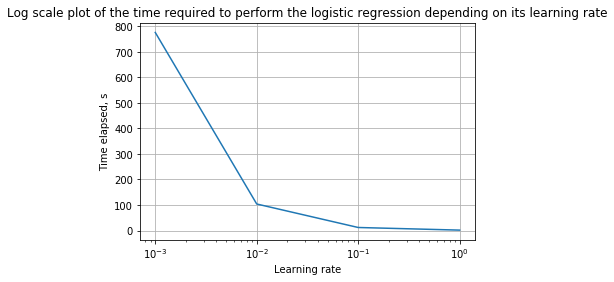

In [64]:
plt.plot(learning_rates, times)
plt.xlabel('Learning rate')
plt.ylabel('Time elapsed, s')
plt.xscale(value = 'log')
plt.grid()
plt.title('Log scale plot of the time required to perform the logistic regression depending on its learning rate')
plt.show()

We see that the results do not depend on the choise of the learning rate but setting the learning rate closer to zero results in a significant increase of time.

Now we check how does the accuracy depends of the number of iteratins of the gradient descent method used in logistic regression. We set the maximum $n_{iterations}=10^3$.

In [116]:
stds = []
mus = []
times = []

n_iterations = range(1, 1000)

for n in n_iterations:
    print('n_iterations =', n)
    start_time = time.time()
    mu_LR, std_LR = Linear_Regression_Iter_k_Fold_Cross_Validation(ionosphere,
                                                              k = 5,
                                                              n_iterations = n)
    time_ellapsed = time.time() - start_time
    
    print('Time ellapsed:', time_ellapsed)
    times.append(time_ellapsed)
    
    mus.append(mu_LR)
    stds.append(std_LR)
    
    print('----------------------------------------')

n_iterations = 1
Logistic regression:
Fold 1
Correct classifications: 40
Incorrect classifications: 30
Accuracy of the logistic regression: 0.5714285714285714
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6714285714285715
Logistic regression standard deviation: 0.18024926052100007
Time ellapsed: 0.04902911186218262
----------------------------

Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6685714285714286
Logistic regression standard deviation: 0.18236541025409084
Time ellapsed: 0.08679318428039551
----------------------------------------
n_iterations = 12
Logistic regression:
Fold 1
Correct classifications: 40
Incorrect classifications: 30
Accuracy of the logistic regression: 0.5714285714285714
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------

Fold 1
Correct classifications: 40
Incorrect classifications: 30
Accuracy of the logistic regression: 0.5714285714285714
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6714285714285715
Logistic regression standard deviation: 0.18024926052100007
Time ellapsed: 0.10065197944641113
----------------------------------------
n_iterations = 22
Logisti

Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6742857142857143
Logistic regression standard deviation: 0.1787484836527663
Time ellapsed: 0.160722017288208
----------------------------------------
n_iterations = 30
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
-------------------------------------

Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6742857142857143
Logistic regression standard deviation: 0.1787484836527663
Time ellapsed: 0.13248491287231445
----------------------------------------
n_iterations = 38
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
-----------------------------------

Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6742857142857143
Logistic regression standard deviation: 0.1787484836527663
Time ellapsed: 0.24896883964538574
----------------------------------------
n_iterations = 47
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
-----------------------------------

Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6771428571428572
Logistic regression standard deviation: 0.17672762393362418
Time ellapsed: 0.1823580265045166
----------------------------------------
n_iterations = 56
Logistic regres

Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 4
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6828571428571429
Logistic regression standard deviation: 0.173181513836477
Time ellapsed: 0.19894719123840332
----------------------------------------
n_iterations = 64
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
------------------------------------

Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6828571428571429
Logistic regression standard deviation: 0.173181513836477
Time ellapsed: 0.21791291236877441
----------------------------------------
n_iterations = 72
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
------------------------------------

Correct classifications: 52
Incorrect classifications: 18
Accuracy of the logistic regression: 0.7428571428571429
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6857142857142857
Logistic regression standard deviation: 0.17402791237532642
Time ellapsed: 0.24367904663085938
----------------------------------------
n_iterations = 81
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------

Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 4
Correct classifications: 52
Incorrect classifications: 18
Accuracy of the logistic regression: 0.7428571428571429
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6857142857142857
Logistic regression standard deviation: 0.17402791237532642
Time ellapsed: 0.26396918296813965
----------------------------------------
n_iterations = 90
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------

Correct classifications: 52
Incorrect classifications: 18
Accuracy of the logistic regression: 0.7428571428571429
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6857142857142857
Logistic regression standard deviation: 0.17402791237532642
Time ellapsed: 0.2888941764831543
----------------------------------------
n_iterations = 98
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
-----------------------------------

Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 52
Incorrect classifications: 18
Accuracy of the logistic regression: 0.7428571428571429
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6885714285714286
Logistic regression standard deviation: 0.17247300883184652
Time ellapsed: 0.2898709774017334
----------------------------------------
n_iterations = 107
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
C

Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6885714285714286
Logistic regression standard deviation: 0.17247300883184652
Time ellapsed: 0.31217074394226074
----------------------------------------
n_iterations = 115
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 52
Incorrect classifications: 18
Accuracy of the logistic regression: 0.7428571428571429
----------------------------------------
Fold 5


Correct classifications: 52
Incorrect classifications: 18
Accuracy of the logistic regression: 0.7428571428571429
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6885714285714286
Logistic regression standard deviation: 0.17247300883184652
Time ellapsed: 0.3210477828979492
----------------------------------------
n_iterations = 124
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
C

Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 36
Incorrect classifications: 34
Accuracy of the logistic regression: 0.5142857142857142
----------------------------------------
Fold 3
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 53
Incorrect classifications: 17
Accuracy of the logistic regression: 0.7571428571428571
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6914285714285715
Logistic regression standard deviation: 0.17346410556183475
Time ellapsed: 0.3475677967071533
----------------------------------------
n_iterations = 133
Logistic regression:
Fold 1
C

Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 54
Incorrect classifications: 16
Accuracy of the logistic regression: 0.7714285714285715
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.6971428571428572
Logistic regression standard deviation: 0.17176158131644728
Time ellapsed: 0.3616151809692383
----------------------------------------
n_iterations = 141
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
C

Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7
Logistic regression standard deviation: 0.17308721406698238
Time ellapsed: 0.3857767581939697
----------------------------------------
n_iterations = 149
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifi

Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7
Logistic regression standard deviation: 0.17308721406698238
Time ellapsed: 0.4072608947753906
----------------------------------------
n_iterations = 158
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifi

Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7
Logistic regression standard deviation: 0.17308721406698238
Time ellapsed: 0.4328031539916992
----------------------------------------
n_iterations = 167
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifi

Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7028571428571428
Logistic regression standard deviation: 0.17152378308347008
Time ellapsed: 0.44524288177490234
----------------------------------------
n_iterations = 175
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 43
Incorrect classifications: 27
Accuracy of the logistic regression: 0.6142857142857143
---------------------------------

Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 43
Incorrect classifications: 27
Accuracy of the logistic regression: 0.6142857142857143
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7028571428571428
Logistic regression standard deviation: 0.17152378308347008
Time ellapsed: 0.45405006408691406
----------------------------------------
n_iterations = 184
Logistic regr

Correct classifications: 43
Incorrect classifications: 27
Accuracy of the logistic regression: 0.6142857142857143
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7028571428571428
Logistic regression standard deviation: 0.17152378308347008
Time ellapsed: 0.6147110462188721
----------------------------------------
n_iterations = 192
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------

Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7028571428571428
Logistic regression standard deviation: 0.17152378308347008
Time ellapsed: 0.493959903717041
----------------------------------------
n_iterations = 200
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 43
Incorrect classifications: 27
Accuracy of the logistic regression: 0.6142857142857143
-----------------------------------

Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 43
Incorrect classifications: 27
Accuracy of the logistic regression: 0.6142857142857143
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7028571428571428
Logistic regression standard deviation: 0.17152378308347008
Time ellapsed: 0.514556884765625
----------------------------------------
n_iterations = 209
Logistic regres

Correct classifications: 37
Incorrect classifications: 33
Accuracy of the logistic regression: 0.5285714285714286
----------------------------------------
Fold 3
Correct classifications: 43
Incorrect classifications: 27
Accuracy of the logistic regression: 0.6142857142857143
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7028571428571428
Logistic regression standard deviation: 0.17152378308347008
Time ellapsed: 0.527867317199707
----------------------------------------
n_iterations = 217
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
-----------------------------------

Correct classifications: 44
Incorrect classifications: 26
Accuracy of the logistic regression: 0.6285714285714286
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7085714285714285
Logistic regression standard deviation: 0.16723440716185026
Time ellapsed: 0.8621759414672852
----------------------------------------
n_iterations = 225
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------

Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7085714285714285
Logistic regression standard deviation: 0.16723440716185026
Time ellapsed: 0.6019260883331299
----------------------------------------
n_iterations = 233
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------

Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.1659604083595155
Time ellapsed: 0.5979480743408203
----------------------------------------
n_iterations = 242
Logistic regres

Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.1659604083595155
Time ellapsed: 0.6082620620727539
----------------------------------------
n_iterations = 250
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
-----------------------------------

Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.1659604083595155
Time ellapsed: 0.6269068717956543
----------------------------------------
n_iterations = 258
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
-----------------------------------

Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 70
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.1659604083595155
Time ellapsed: 0.7240667343139648
----------------------------------------
n_iterations = 267
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
-----------------------------------

Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7085714285714285
Logistic regression standard deviation: 0.1610171748983471
Time ellapsed: 0.7455410957336426
----------------------------------------
n_iterations = 275
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7085714285714285
Logistic regression standard deviation: 0.1610171748983471
Time ellapsed: 1.1569750308990479
----------------------------------------
n_iterations = 283
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.15994897145461034
Time ellapsed: 0.6963891983032227
----------------------------------------
n_iterations = 291
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
-------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.15994897145461034
Time ellapsed: 0.7097160816192627
----------------------------------------
n_iterations = 299
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
-------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7114285714285714
Logistic regression standard deviation: 0.15994897145461034
Time ellapsed: 0.7260570526123047
----------------------------------------
n_iterations = 307
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 38
Incorrect classifications: 32
Accuracy of the logistic regression: 0.5428571428571428
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
-------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.7718310356140137
----------------------------------------
n_iterations = 315
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.762152910232544
----------------------------------------
n_iterations = 323
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
---------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.7736001014709473
----------------------------------------
n_iterations = 331
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.7984750270843506
----------------------------------------
n_iterations = 339
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.8019809722900391
----------------------------------------
n_iterations = 347
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.8225691318511963
----------------------------------------
n_iterations = 355
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.8373539447784424
----------------------------------------
n_iterations = 363
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 55
Incorrect classifications: 15
Accuracy of the logistic regression: 0.7857142857142857
--------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7142857142857142
Logistic regression standard deviation: 0.1570129333032467
Time ellapsed: 0.8640849590301514
----------------------------------------
n_iterations = 371
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 56
Incorrect classifications: 14
Accuracy of the logistic regression: 0.8
-----------------------------------

Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 56
Incorrect classifications: 14
Accuracy of the logistic regression: 0.8
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7171428571428571
Logistic regression standard deviation: 0.15841047172147557
Time ellapsed: 0.8703081607818604
----------------------------------------
n_iterations = 380
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------

Correct classifications: 56
Incorrect classifications: 14
Accuracy of the logistic regression: 0.8
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7171428571428571
Logistic regression standard deviation: 0.15841047172147557
Time ellapsed: 0.9078688621520996
----------------------------------------
n_iterations = 388
Logistic regression:
Fold 1
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------

Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
----------------------------------------
Fold 3
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7228571428571428
Logistic regression standard deviation: 0.15768736830339006
Time ellapsed: 0.913841962814331
----------------------------------------
n_iterations = 397
Logistic regres

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7257142857142856
Logistic regression standard deviation: 0.1565964526405111
Time ellapsed: 0.927138090133667
----------------------------------------
n_iterations = 405
Logistic regression:
Fold 1
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 2
Correct classifications: 39
Incorrect classifications: 31
Accuracy of the logistic regression: 0.5571428571428572
------------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7285714285714284
Logistic regression standard deviation: 0.15359634349389273
Time ellapsed: 0.9340901374816895
----------------------------------------
n_iterations = 413
Logistic regression:
Fold 1
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 2
Correct classifications: 40
Incorrect classifications: 30
Accuracy of the logistic regression: 0.5714285714285714
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------

Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 2
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7314285714285715
Logistic regression standard deviation: 0.15075321095169053
Time ellapsed: 0.9854819774627686
----------------------------------------
n_iterations = 422
Logistic regre

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7314285714285715
Logistic regression standard deviation: 0.15075321095169053
Time ellapsed: 0.9746537208557129
----------------------------------------
n_iterations = 430
Logistic regression:
Fold 1
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 2
Correct classifications: 41
Incorrect classifications: 29
Accuracy of the logistic regression: 0.5857142857142857
----------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7371428571428572
Logistic regression standard deviation: 0.1455741623183657
Time ellapsed: 0.985227108001709
----------------------------------------
n_iterations = 438
Logistic regression:
Fold 1
Correct classifications: 44
Incorrect classifications: 26
Accuracy of the logistic regression: 0.6285714285714286
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
------------------------------------

Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7428571428571429
Logistic regression standard deviation: 0.14113244611689682
Time ellapsed: 0.9975919723510742
----------------------------------------
n_iterations = 447
Logistic regre

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7428571428571429
Logistic regression standard deviation: 0.14113244611689682
Time ellapsed: 1.0387539863586426
----------------------------------------
n_iterations = 455
Logistic regression:
Fold 1
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------

Correct classifications: 57
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8142857142857143
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7428571428571429
Logistic regression standard deviation: 0.14113244611689682
Time ellapsed: 1.0428707599639893
----------------------------------------
n_iterations = 463
Logistic regression:
Fold 1
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.7200167179107666
----------------------------------------
n_iterations = 471
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------

Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.5029609203338623
----------------------------------------
n_iterations = 480
Logistic regre

Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.1275248527526855
----------------------------------------
n_iterations = 488
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.1374270915985107
----------------------------------------
n_iterations = 496
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.1590220928192139
----------------------------------------
n_iterations = 504
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.9848246574401855
----------------------------------------
n_iterations = 512
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------

Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.1888630390167236
----------------------------------------
n_iterations = 521
Logistic regre

Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.4948220252990723
----------------------------------------
n_iterations = 529
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7485714285714286
Logistic regression standard deviation: 0.14072697549742577
Time ellapsed: 1.2589449882507324
----------------------------------------
n_iterations = 537
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 42
Incorrect classifications: 28
Accuracy of the logistic regression: 0.6
----------------------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7514285714285714
Logistic regression standard deviation: 0.13779606344899994
Time ellapsed: 2.2358169555664062
----------------------------------------
n_iterations = 545
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 44
Incorrect classifications: 26
Accuracy of the logistic regression: 0.6285714285714286
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7571428571428572
Logistic regression standard deviation: 0.13248026422136722
Time ellapsed: 1.2861270904541016
----------------------------------------
n_iterations = 553
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7571428571428572
Logistic regression standard deviation: 0.13248026422136722
Time ellapsed: 1.2693228721618652
----------------------------------------
n_iterations = 561
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7571428571428572
Logistic regression standard deviation: 0.13248026422136722
Time ellapsed: 1.2947242259979248
----------------------------------------
n_iterations = 569
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7571428571428572
Logistic regression standard deviation: 0.13248026422136722
Time ellapsed: 1.3034429550170898
----------------------------------------
n_iterations = 577
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7571428571428572
Logistic regression standard deviation: 0.13248026422136722
Time ellapsed: 1.3226022720336914
----------------------------------------
n_iterations = 585
Logistic regression:
Fold 1
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 2
Correct classifications: 45
Incorrect classifications: 25
Accuracy of the logistic regression: 0.6428571428571429
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7571428571428572
Logistic regression standard deviation: 0.13248026422136722
Time ellapsed: 1.3441290855407715
----------------------------------------
n_iterations = 593
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7628571428571429
Logistic regression standard deviation: 0.12796683243747828
Time ellapsed: 1.3519222736358643
----------------------------------------
n_iterations = 601
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7628571428571429
Logistic regression standard deviation: 0.12796683243747828
Time ellapsed: 1.3714728355407715
----------------------------------------
n_iterations = 609
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7628571428571429
Logistic regression standard deviation: 0.12796683243747828
Time ellapsed: 1.3879239559173584
----------------------------------------
n_iterations = 617
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7628571428571429
Logistic regression standard deviation: 0.12796683243747828
Time ellapsed: 1.4030277729034424
----------------------------------------
n_iterations = 625
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 58
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8285714285714286
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7628571428571429
Logistic regression standard deviation: 0.12796683243747828
Time ellapsed: 1.6037981510162354
----------------------------------------
n_iterations = 633
Logistic regression:
Fold 1
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 59
Incorrect classifications: 11
Accuracy of the logistic regression: 0.8428571428571429
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7685714285714286
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.4615631103515625
----------------------------------------
n_iterations = 641
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 59
Incorrect classifications: 11
Accuracy of the logistic regression: 0.8428571428571429
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7685714285714286
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.4605669975280762
----------------------------------------
n_iterations = 649
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.460726022720337
----------------------------------------
n_iterations = 657
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
--------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.4844748973846436
----------------------------------------
n_iterations = 665
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.5493450164794922
----------------------------------------
n_iterations = 673
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.5289769172668457
----------------------------------------
n_iterations = 681
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.556898832321167
----------------------------------------
n_iterations = 689
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
--------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.5567891597747803
----------------------------------------
n_iterations = 697
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7714285714285715
Logistic regression standard deviation: 0.12936264483053456
Time ellapsed: 1.5706512928009033
----------------------------------------
n_iterations = 705
Logistic regression:
Fold 1
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7742857142857142
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.5140390396118164
----------------------------------------
n_iterations = 713
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7742857142857142
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.6475169658660889
----------------------------------------
n_iterations = 722
Logistic regre

Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7742857142857142
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.6156890392303467
----------------------------------------
n_iterations = 730
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7742857142857142
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.49068284034729
----------------------------------------
n_iterations = 738
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
------------------------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7742857142857142
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.492537021636963
----------------------------------------
n_iterations = 746
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-----------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7742857142857142
Logistic regression standard deviation: 0.12758350606723493
Time ellapsed: 1.5997240543365479
----------------------------------------
n_iterations = 754
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 2.125962972640991
----------------------------------------
n_iterations = 763
Logistic regres

Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 2.0727310180664062
----------------------------------------
n_iterations = 771
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------

Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 1.8646361827850342
----------------------------------------
n_iterations = 779
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 1.7446060180664062
----------------------------------------
n_iterations = 787
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 2.4279518127441406
----------------------------------------
n_iterations = 795
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 1.6310100555419922
----------------------------------------
n_iterations = 804
Logistic regre

Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 1.61393404006958
----------------------------------------
n_iterations = 812
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
------------------------------------

Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------------
Fold 4
Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 2.149196147918701
----------------------------------------
n_iterations = 820
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
-----------------------------------

Correct classifications: 60
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7771428571428571
Logistic regression standard deviation: 0.12538919004280968
Time ellapsed: 1.8705987930297852
----------------------------------------
n_iterations = 828
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 48
Incorrect classifications: 22
Accuracy of the logistic regression: 0.6857142857142857
----------------------------------

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.8842906951904297
----------------------------------------
n_iterations = 837
Logistic regression:
Fold 1
Co

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.8890039920806885
----------------------------------------
n_iterations = 845
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Co

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.6509897708892822
----------------------------------------
n_iterations = 853
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Co

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.691831111907959
----------------------------------------
n_iterations = 862
Logistic regression:
Fold 1
Cor

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.8326802253723145
----------------------------------------
n_iterations = 870
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Co

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.7696349620819092
----------------------------------------
n_iterations = 878
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Co

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.8176319599151611
----------------------------------------
n_iterations = 887
Logistic regression:
Fold 1
Co

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7828571428571428
Logistic regression standard deviation: 0.12532406971120752
Time ellapsed: 1.8132820129394531
----------------------------------------
n_iterations = 895
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 46
Incorrect classifications: 24
Accuracy of the logistic regression: 0.6571428571428571
----------------------------------------
Fold 3
Co

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7857142857142857
Logistic regression standard deviation: 0.12255777479729843
Time ellapsed: 1.8271081447601318
----------------------------------------
n_iterations = 903
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Co

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7857142857142857
Logistic regression standard deviation: 0.12255777479729843
Time ellapsed: 1.8652257919311523
----------------------------------------
n_iterations = 912
Logistic regression:
Fold 1
Co

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7857142857142857
Logistic regression standard deviation: 0.12255777479729843
Time ellapsed: 1.9471919536590576
----------------------------------------
n_iterations = 920
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Co

Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7885714285714286
Logistic regression standard deviation: 0.12067835475395933
Time ellapsed: 1.835216760635376
----------------------------------------
n_iterations = 928
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 50
Incorrect classifications: 20
Accuracy of the logistic regression: 0.7142857142857143
------------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7885714285714286
Logistic regression standard deviation: 0.12067835475395933
Time ellapsed: 2.133452892303467
----------------------------------------
n_iterations = 936
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 50
Incorrect classifications: 20
Accuracy of the logistic regression: 0.7142857142857143
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
------------------------------------

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 50
Incorrect classifications: 20
Accuracy of the logistic regression: 0.7142857142857143
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7885714285714286
Logistic regression standard deviation: 0.12067835475395933
Time ellapsed: 1.8911023139953613
----------------------------------------
n_iterations = 945
Logistic regres

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7914285714285715
Logistic regression standard deviation: 0.11904380946285524
Time ellapsed: 1.8643009662628174
----------------------------------------
n_iterations = 953
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
-----------------------------------

Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7914285714285715
Logistic regression standard deviation: 0.11904380946285524
Time ellapsed: 1.9396941661834717
----------------------------------------
n_iterations = 961
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
-----------------------------------

Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7914285714285715
Logistic regression standard deviation: 0.11904380946285524
Time ellapsed: 1.9443261623382568
----------------------------------------
n_iterations = 969
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
-----------------------------------

Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7914285714285715
Logistic regression standard deviation: 0.11904380946285524
Time ellapsed: 1.9899709224700928
----------------------------------------
n_iterations = 977
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
-----------------------------------

Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
----------------------------------------
Fold 2
Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7914285714285715
Logistic regression standard deviation: 0.11904380946285524
Time ellapsed: 2.9110519886016846
----------------------------------------
n_iterations = 986
Logistic regres

Correct classifications: 47
Incorrect classifications: 23
Accuracy of the logistic regression: 0.6714285714285714
----------------------------------------
Fold 3
Correct classifications: 51
Incorrect classifications: 19
Accuracy of the logistic regression: 0.7285714285714285
----------------------------------------
Fold 4
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Fold 5
Correct classifications: 69
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9857142857142858
----------------------------------------
Logistic regression mean: 0.7914285714285715
Logistic regression standard deviation: 0.11904380946285524
Time ellapsed: 2.6063339710235596
----------------------------------------
n_iterations = 994
Logistic regression:
Fold 1
Correct classifications: 49
Incorrect classifications: 21
Accuracy of the logistic regression: 0.7
-----------------------------------

We can obtain error as $error = 1 - \mu$.

In [133]:
error = []
for m in mus:
    error.append(1 - m)

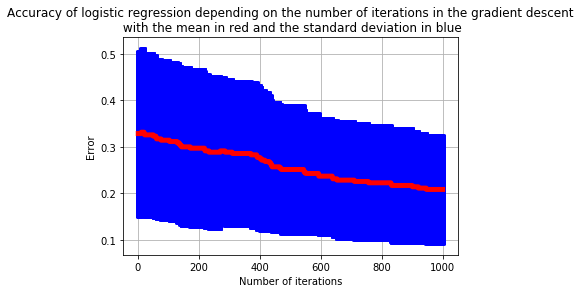

In [135]:
#plt.plot(n_iterations, mus)
plt.xlabel('Number of iterations')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(n_iterations, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the number of iterations in the gradient descent\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the mean of accuracy grows with the number of iterations. Note that its standard deviation shrinks.

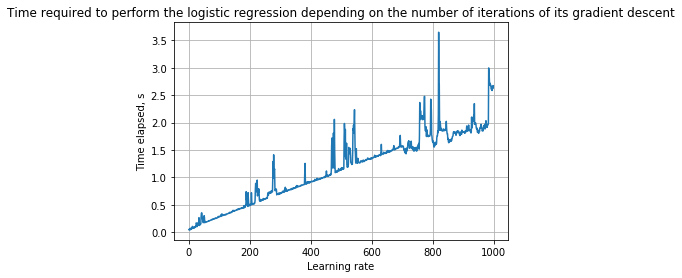

In [130]:
plt.plot(n_iterations, times)
plt.xlabel('Learning rate')
plt.ylabel('Time elapsed, s')
plt.grid()
plt.title('Time required to perform the logistic regression depending on the number of iterations of its gradient descent')
plt.show()

Note that the time grows linearly except for some cases where the algorithm seems to overshoot.

We can get the dependece of the error rate of both learning methods on the test/train split ratio. Firstly, the logistic regression is analyzied.

In [137]:
split_ratio = []
mus = []
stds = []

for i in range(1, 100):
    print('Logistic regression:')
    
    logistic_regression_accuracy = []
    
    split_ratio.append(i * 0.01)
    print('Train-to-test split ratio:', split_ratio[i - 1])
    
    # Splitting the dataset into folds:
    for k in range(5):
        msk = np.random.rand(len(ionosphere)) < split_ratio[i - 1]
        train = ionosphere[msk]
        test = ionosphere[~msk]
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Logistic regression
        
        LR = Logistic_Regression()
        w = LR.fit(X_train, y_train)
        pred = LR.predict(X_test, w)
        logistic_regression_accuracy.append(LR.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_LR = np.mean(logistic_regression_accuracy)
    std_LR = np.std(logistic_regression_accuracy)
    
    print('Logistic regression mean:', mu_LR)
    print('Logistic regression standard deviation:', std_LR)
    
    mus.append(mu_LR)
    stds.append(std_LR)

Logistic regression:
Train-to-test split ratio: 0.01
Number of iterations of the gradient descent: 7995
Correct classifications: 240
Incorrect classifications: 106
Accuracy of the logistic regression: 0.6936416184971098
----------------------------------------
Number of iterations of the gradient descent: 13539
Correct classifications: 251
Incorrect classifications: 90
Accuracy of the logistic regression: 0.7360703812316716
----------------------------------------
Number of iterations of the gradient descent: 4782
Correct classifications: 140
Incorrect classifications: 207
Accuracy of the logistic regression: 0.4034582132564842
----------------------------------------
Number of iterations of the gradient descent: 3292
Correct classifications: 231
Incorrect classifications: 117
Accuracy of the logistic regression: 0.6637931034482759
----------------------------------------
Number of iterations of the gradient descent: 3785
Correct classifications: 224
Incorrect classifications: 116
Accu

Number of iterations of the gradient descent: 23826
Correct classifications: 246
Incorrect classifications: 72
Accuracy of the logistic regression: 0.7735849056603774
----------------------------------------
Number of iterations of the gradient descent: 20112
Correct classifications: 250
Incorrect classifications: 70
Accuracy of the logistic regression: 0.78125
----------------------------------------
Number of iterations of the gradient descent: 18420
Correct classifications: 250
Incorrect classifications: 59
Accuracy of the logistic regression: 0.8090614886731392
----------------------------------------
Number of iterations of the gradient descent: 15952
Correct classifications: 251
Incorrect classifications: 66
Accuracy of the logistic regression: 0.7917981072555205
----------------------------------------
Number of iterations of the gradient descent: 9507
Correct classifications: 234
Incorrect classifications: 89
Accuracy of the logistic regression: 0.7244582043343654
-------------

Number of iterations of the gradient descent: 34567
Correct classifications: 228
Incorrect classifications: 75
Accuracy of the logistic regression: 0.7524752475247525
----------------------------------------
Number of iterations of the gradient descent: 37784
Correct classifications: 249
Incorrect classifications: 55
Accuracy of the logistic regression: 0.819078947368421
----------------------------------------
Number of iterations of the gradient descent: 40654
Correct classifications: 247
Incorrect classifications: 51
Accuracy of the logistic regression: 0.8288590604026845
----------------------------------------
Number of iterations of the gradient descent: 31212
Correct classifications: 256
Incorrect classifications: 54
Accuracy of the logistic regression: 0.8258064516129032
----------------------------------------
Number of iterations of the gradient descent: 26395
Correct classifications: 243
Incorrect classifications: 57
Accuracy of the logistic regression: 0.81
----------------

Number of iterations of the gradient descent: 41339
Correct classifications: 243
Incorrect classifications: 44
Accuracy of the logistic regression: 0.8466898954703833
----------------------------------------
Number of iterations of the gradient descent: 35895
Correct classifications: 231
Incorrect classifications: 42
Accuracy of the logistic regression: 0.8461538461538461
----------------------------------------
Number of iterations of the gradient descent: 61551
Correct classifications: 216
Incorrect classifications: 49
Accuracy of the logistic regression: 0.8150943396226416
----------------------------------------
Number of iterations of the gradient descent: 39724
Correct classifications: 222
Incorrect classifications: 53
Accuracy of the logistic regression: 0.8072727272727273
----------------------------------------
Number of iterations of the gradient descent: 27839
Correct classifications: 234
Incorrect classifications: 44
Accuracy of the logistic regression: 0.841726618705036
--

Number of iterations of the gradient descent: 46269
Correct classifications: 194
Incorrect classifications: 39
Accuracy of the logistic regression: 0.8326180257510729
----------------------------------------
Number of iterations of the gradient descent: 38041
Correct classifications: 212
Incorrect classifications: 34
Accuracy of the logistic regression: 0.8617886178861789
----------------------------------------
Number of iterations of the gradient descent: 41301
Correct classifications: 203
Incorrect classifications: 40
Accuracy of the logistic regression: 0.8353909465020576
----------------------------------------
Number of iterations of the gradient descent: 34918
Correct classifications: 205
Incorrect classifications: 40
Accuracy of the logistic regression: 0.8367346938775511
----------------------------------------
Number of iterations of the gradient descent: 40513
Correct classifications: 199
Incorrect classifications: 42
Accuracy of the logistic regression: 0.8257261410788381
-

Number of iterations of the gradient descent: 42590
Correct classifications: 204
Incorrect classifications: 35
Accuracy of the logistic regression: 0.8535564853556485
----------------------------------------
Number of iterations of the gradient descent: 32641
Correct classifications: 190
Incorrect classifications: 35
Accuracy of the logistic regression: 0.8444444444444444
----------------------------------------
Number of iterations of the gradient descent: 53113
Correct classifications: 193
Incorrect classifications: 33
Accuracy of the logistic regression: 0.8539823008849557
----------------------------------------
Number of iterations of the gradient descent: 52437
Correct classifications: 194
Incorrect classifications: 30
Accuracy of the logistic regression: 0.8660714285714286
----------------------------------------
Number of iterations of the gradient descent: 55072
Correct classifications: 197
Incorrect classifications: 34
Accuracy of the logistic regression: 0.8528138528138528
-

Number of iterations of the gradient descent: 47952
Correct classifications: 192
Incorrect classifications: 30
Accuracy of the logistic regression: 0.8648648648648649
----------------------------------------
Number of iterations of the gradient descent: 45666
Correct classifications: 171
Incorrect classifications: 37
Accuracy of the logistic regression: 0.8221153846153846
----------------------------------------
Number of iterations of the gradient descent: 45349
Correct classifications: 183
Incorrect classifications: 28
Accuracy of the logistic regression: 0.8672985781990521
----------------------------------------
Number of iterations of the gradient descent: 42041
Correct classifications: 163
Incorrect classifications: 27
Accuracy of the logistic regression: 0.8578947368421053
----------------------------------------
Number of iterations of the gradient descent: 40796
Correct classifications: 170
Incorrect classifications: 32
Accuracy of the logistic regression: 0.8415841584158416
-

Number of iterations of the gradient descent: 44741
Correct classifications: 158
Incorrect classifications: 26
Accuracy of the logistic regression: 0.8586956521739131
----------------------------------------
Number of iterations of the gradient descent: 52191
Correct classifications: 149
Incorrect classifications: 21
Accuracy of the logistic regression: 0.8764705882352941
----------------------------------------
Number of iterations of the gradient descent: 35938
Correct classifications: 153
Incorrect classifications: 26
Accuracy of the logistic regression: 0.8547486033519553
----------------------------------------
Number of iterations of the gradient descent: 39950
Correct classifications: 143
Incorrect classifications: 18
Accuracy of the logistic regression: 0.8881987577639752
----------------------------------------
Number of iterations of the gradient descent: 31669
Correct classifications: 153
Incorrect classifications: 32
Accuracy of the logistic regression: 0.827027027027027
--

Number of iterations of the gradient descent: 46335
Correct classifications: 121
Incorrect classifications: 20
Accuracy of the logistic regression: 0.8581560283687943
----------------------------------------
Number of iterations of the gradient descent: 34236
Correct classifications: 141
Incorrect classifications: 18
Accuracy of the logistic regression: 0.8867924528301887
----------------------------------------
Number of iterations of the gradient descent: 44040
Correct classifications: 118
Incorrect classifications: 23
Accuracy of the logistic regression: 0.8368794326241135
----------------------------------------
Number of iterations of the gradient descent: 40164
Correct classifications: 138
Incorrect classifications: 23
Accuracy of the logistic regression: 0.8571428571428571
----------------------------------------
Number of iterations of the gradient descent: 41664
Correct classifications: 131
Incorrect classifications: 21
Accuracy of the logistic regression: 0.8618421052631579
-

Number of iterations of the gradient descent: 37007
Correct classifications: 116
Incorrect classifications: 11
Accuracy of the logistic regression: 0.9133858267716536
----------------------------------------
Number of iterations of the gradient descent: 35508
Correct classifications: 104
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8888888888888888
----------------------------------------
Number of iterations of the gradient descent: 42360
Correct classifications: 102
Incorrect classifications: 15
Accuracy of the logistic regression: 0.8717948717948718
----------------------------------------
Number of iterations of the gradient descent: 41749
Correct classifications: 111
Incorrect classifications: 11
Accuracy of the logistic regression: 0.9098360655737705
----------------------------------------
Number of iterations of the gradient descent: 32905
Correct classifications: 114
Incorrect classifications: 13
Accuracy of the logistic regression: 0.8976377952755905
-

Number of iterations of the gradient descent: 35764
Correct classifications: 76
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8941176470588236
----------------------------------------
Number of iterations of the gradient descent: 42315
Correct classifications: 87
Incorrect classifications: 13
Accuracy of the logistic regression: 0.87
----------------------------------------
Number of iterations of the gradient descent: 32259
Correct classifications: 81
Incorrect classifications: 9
Accuracy of the logistic regression: 0.9
----------------------------------------
Number of iterations of the gradient descent: 36588
Correct classifications: 79
Incorrect classifications: 14
Accuracy of the logistic regression: 0.8494623655913979
----------------------------------------
Number of iterations of the gradient descent: 34363
Correct classifications: 83
Incorrect classifications: 11
Accuracy of the logistic regression: 0.8829787234042553
-------------------------------------

Number of iterations of the gradient descent: 34821
Correct classifications: 72
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8780487804878049
----------------------------------------
Number of iterations of the gradient descent: 32513
Correct classifications: 66
Incorrect classifications: 15
Accuracy of the logistic regression: 0.8148148148148148
----------------------------------------
Number of iterations of the gradient descent: 34241
Correct classifications: 66
Incorrect classifications: 12
Accuracy of the logistic regression: 0.8461538461538461
----------------------------------------
Number of iterations of the gradient descent: 30401
Correct classifications: 61
Incorrect classifications: 9
Accuracy of the logistic regression: 0.8714285714285714
----------------------------------------
Number of iterations of the gradient descent: 34142
Correct classifications: 70
Incorrect classifications: 8
Accuracy of the logistic regression: 0.8974358974358975
--------

Number of iterations of the gradient descent: 38786
Correct classifications: 45
Incorrect classifications: 11
Accuracy of the logistic regression: 0.8035714285714286
----------------------------------------
Number of iterations of the gradient descent: 32664
Correct classifications: 45
Incorrect classifications: 6
Accuracy of the logistic regression: 0.8823529411764706
----------------------------------------
Number of iterations of the gradient descent: 27116
Correct classifications: 42
Incorrect classifications: 10
Accuracy of the logistic regression: 0.8076923076923077
----------------------------------------
Number of iterations of the gradient descent: 39627
Correct classifications: 49
Incorrect classifications: 4
Accuracy of the logistic regression: 0.9245283018867925
----------------------------------------
Number of iterations of the gradient descent: 32569
Correct classifications: 47
Incorrect classifications: 8
Accuracy of the logistic regression: 0.8545454545454545
---------

Number of iterations of the gradient descent: 30855
Correct classifications: 26
Incorrect classifications: 3
Accuracy of the logistic regression: 0.896551724137931
----------------------------------------
Number of iterations of the gradient descent: 34222
Correct classifications: 22
Incorrect classifications: 2
Accuracy of the logistic regression: 0.9166666666666666
----------------------------------------
Number of iterations of the gradient descent: 35437
Correct classifications: 28
Incorrect classifications: 1
Accuracy of the logistic regression: 0.9655172413793104
----------------------------------------
Number of iterations of the gradient descent: 31635
Correct classifications: 28
Incorrect classifications: 2
Accuracy of the logistic regression: 0.9333333333333333
----------------------------------------
Number of iterations of the gradient descent: 34596
Correct classifications: 37
Incorrect classifications: 4
Accuracy of the logistic regression: 0.9024390243902439
------------

Number of iterations of the gradient descent: 34109
Correct classifications: 3
Incorrect classifications: 1
Accuracy of the logistic regression: 0.75
----------------------------------------
Number of iterations of the gradient descent: 33567
Correct classifications: 4
Incorrect classifications: 0
Accuracy of the logistic regression: 1.0
----------------------------------------
Number of iterations of the gradient descent: 34205
Correct classifications: 3
Incorrect classifications: 3
Accuracy of the logistic regression: 0.5
----------------------------------------
Number of iterations of the gradient descent: 30793
Correct classifications: 5
Incorrect classifications: 1
Accuracy of the logistic regression: 0.8333333333333334
----------------------------------------
Logistic regression mean: 0.8166666666666667
Logistic regression standard deviation: 0.1855921454276674


Similarly, we obtain the error as $error = 1 - \mu$.

In [140]:
error = []
for m in mus:
    error.append(1 - m)

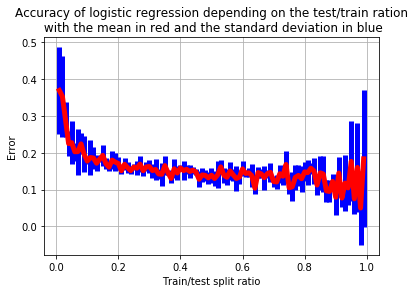

In [141]:
#plt.plot(n_iterations, mus)
plt.xlabel('Train/test split ratio')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(split_ratio, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of logistic regression depending on the test/train ration\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the error assymptotically goes down when we use more data for trainging until the very end where the test data becomes insufficient.

Now the Gaussian Naive Bayes can be analyzed.

In [142]:
split_ratio = []
mus = []
stds = []

for i in range(1, 100):
    print('Gaussian Naive Bayes:')
    
    naive_bayes_accuracy = []
    
    split_ratio.append(i * 0.01)
    print('Train-to-test split ratio:', split_ratio[i - 1])
    
    # Splitting the dataset into folds:
    for k in range(5):
        msk = np.random.rand(len(ionosphere)) < split_ratio[i - 1]
        train = ionosphere[msk]
        test = ionosphere[~msk]
        
        # Train dataset:
        X_train = train.iloc[:, :-1] # feature values
        y_train = train.iloc[:, -1] # target values
        
        # Test dataset:
        X_test = test.iloc[:, :-1] # feature values
        y_test = test.iloc[:, -1] # target values
        
        # Naive Bayes
        
        GNB = GaussianNaiveBayes()
        mu, s, log_prior = GNB.fit(X_train, y_train)
        pred = GNB.predict(X_test)
        naive_bayes_accuracy.append(GNB.evaluate_acc(pred, y_test))
        
        print('----------------------------------------')
        
    mu_NB = np.mean(naive_bayes_accuracy)
    std_NB = np.std(naive_bayes_accuracy)
    
    print('Naive Bayes mean:', mu_NB)
    print('Naive Bayes standard deviation:', std_NB)
    
    mus.append(mu_NB)
    stds.append(std_NB)

Gaussian Naive Bayes:
Train-to-test split ratio: 0.01
Correct classifications: 123
Incorrect classifications: 223
Accuracy of the naive Bayes: 0.3554913294797688
----------------------------------------
Correct classifications: 245
Incorrect classifications: 99
Accuracy of the naive Bayes: 0.7122093023255814
----------------------------------------
Correct classifications: 126
Incorrect classifications: 222
Accuracy of the naive Bayes: 0.3620689655172414
----------------------------------------
Correct classifications: 125
Incorrect classifications: 223
Accuracy of the naive Bayes: 0.35919540229885055
----------------------------------------
Correct classifications: 247
Incorrect classifications: 96
Accuracy of the naive Bayes: 0.7201166180758017
----------------------------------------
Naive Bayes mean: 0.5018163235394487
Naive Bayes standard deviation: 0.17504358271780765
Gaussian Naive Bayes:
Train-to-test split ratio: 0.02
Correct classifications: 125
Incorrect classifications: 222

Correct classifications: 231
Incorrect classifications: 90
Accuracy of the naive Bayes: 0.719626168224299
----------------------------------------
Correct classifications: 220
Incorrect classifications: 93
Accuracy of the naive Bayes: 0.7028753993610224
----------------------------------------
Correct classifications: 232
Incorrect classifications: 82
Accuracy of the naive Bayes: 0.7388535031847133
----------------------------------------
Naive Bayes mean: 0.71153600019358
Naive Bayes standard deviation: 0.020104967419229212
Gaussian Naive Bayes:
Train-to-test split ratio: 0.11
Correct classifications: 262
Incorrect classifications: 49
Accuracy of the naive Bayes: 0.842443729903537
----------------------------------------
Correct classifications: 251
Incorrect classifications: 61
Accuracy of the naive Bayes: 0.8044871794871795
----------------------------------------
Correct classifications: 238
Incorrect classifications: 69
Accuracy of the naive Bayes: 0.7752442996742671
-------------

Correct classifications: 230
Incorrect classifications: 53
Accuracy of the naive Bayes: 0.8127208480565371
----------------------------------------
Naive Bayes mean: 0.7747260859508249
Naive Bayes standard deviation: 0.025865755366063836
Gaussian Naive Bayes:
Train-to-test split ratio: 0.2
Correct classifications: 203
Incorrect classifications: 68
Accuracy of the naive Bayes: 0.7490774907749077
----------------------------------------
Correct classifications: 220
Incorrect classifications: 45
Accuracy of the naive Bayes: 0.8301886792452831
----------------------------------------
Correct classifications: 228
Incorrect classifications: 50
Accuracy of the naive Bayes: 0.8201438848920863
----------------------------------------
Correct classifications: 203
Incorrect classifications: 61
Accuracy of the naive Bayes: 0.7689393939393939
----------------------------------------
Correct classifications: 211
Incorrect classifications: 48
Accuracy of the naive Bayes: 0.8146718146718147
----------

Correct classifications: 195
Incorrect classifications: 61
Accuracy of the naive Bayes: 0.76171875
----------------------------------------
Correct classifications: 180
Incorrect classifications: 74
Accuracy of the naive Bayes: 0.7086614173228346
----------------------------------------
Correct classifications: 199
Incorrect classifications: 51
Accuracy of the naive Bayes: 0.796
----------------------------------------
Correct classifications: 199
Incorrect classifications: 54
Accuracy of the naive Bayes: 0.7865612648221344
----------------------------------------
Naive Bayes mean: 0.7738695364289938
Naive Bayes standard deviation: 0.037040382819568084
Gaussian Naive Bayes:
Train-to-test split ratio: 0.3
Correct classifications: 168
Incorrect classifications: 60
Accuracy of the naive Bayes: 0.7368421052631579
----------------------------------------
Correct classifications: 177
Incorrect classifications: 67
Accuracy of the naive Bayes: 0.7254098360655737
-------------------------------

Correct classifications: 190
Incorrect classifications: 35
Accuracy of the naive Bayes: 0.8444444444444444
----------------------------------------
Naive Bayes mean: 0.7868647403653608
Naive Bayes standard deviation: 0.04003145598460051
Gaussian Naive Bayes:
Train-to-test split ratio: 0.39
Correct classifications: 171
Incorrect classifications: 52
Accuracy of the naive Bayes: 0.7668161434977578
----------------------------------------
Correct classifications: 180
Incorrect classifications: 32
Accuracy of the naive Bayes: 0.8490566037735849
----------------------------------------
Correct classifications: 150
Incorrect classifications: 53
Accuracy of the naive Bayes: 0.7389162561576355
----------------------------------------
Correct classifications: 184
Incorrect classifications: 26
Accuracy of the naive Bayes: 0.8761904761904762
----------------------------------------
Correct classifications: 160
Incorrect classifications: 49
Accuracy of the naive Bayes: 0.7655502392344498
----------

Correct classifications: 150
Incorrect classifications: 37
Accuracy of the naive Bayes: 0.8021390374331551
----------------------------------------
Correct classifications: 141
Incorrect classifications: 40
Accuracy of the naive Bayes: 0.7790055248618785
----------------------------------------
Correct classifications: 139
Incorrect classifications: 40
Accuracy of the naive Bayes: 0.776536312849162
----------------------------------------
Correct classifications: 142
Incorrect classifications: 40
Accuracy of the naive Bayes: 0.7802197802197802
----------------------------------------
Correct classifications: 172
Incorrect classifications: 38
Accuracy of the naive Bayes: 0.819047619047619
----------------------------------------
Naive Bayes mean: 0.7913896548823189
Naive Bayes standard deviation: 0.016608833510437685
Gaussian Naive Bayes:
Train-to-test split ratio: 0.49
Correct classifications: 141
Incorrect classifications: 33
Accuracy of the naive Bayes: 0.8103448275862069
-----------

Correct classifications: 117
Incorrect classifications: 37
Accuracy of the naive Bayes: 0.7597402597402597
----------------------------------------
Correct classifications: 117
Incorrect classifications: 29
Accuracy of the naive Bayes: 0.8013698630136986
----------------------------------------
Naive Bayes mean: 0.7784378631819824
Naive Bayes standard deviation: 0.024136857261914092
Gaussian Naive Bayes:
Train-to-test split ratio: 0.58
Correct classifications: 118
Incorrect classifications: 26
Accuracy of the naive Bayes: 0.8194444444444444
----------------------------------------
Correct classifications: 107
Incorrect classifications: 23
Accuracy of the naive Bayes: 0.823076923076923
----------------------------------------
Correct classifications: 107
Incorrect classifications: 29
Accuracy of the naive Bayes: 0.7867647058823529
----------------------------------------
Correct classifications: 134
Incorrect classifications: 26
Accuracy of the naive Bayes: 0.8375
----------------------

Correct classifications: 95
Incorrect classifications: 16
Accuracy of the naive Bayes: 0.8558558558558559
----------------------------------------
Correct classifications: 85
Incorrect classifications: 25
Accuracy of the naive Bayes: 0.7727272727272727
----------------------------------------
Correct classifications: 83
Incorrect classifications: 31
Accuracy of the naive Bayes: 0.7280701754385965
----------------------------------------
Correct classifications: 89
Incorrect classifications: 35
Accuracy of the naive Bayes: 0.717741935483871
----------------------------------------
Correct classifications: 101
Incorrect classifications: 24
Accuracy of the naive Bayes: 0.808
----------------------------------------
Naive Bayes mean: 0.7764790479011191
Naive Bayes standard deviation: 0.05118943482295427
Gaussian Naive Bayes:
Train-to-test split ratio: 0.68
Correct classifications: 89
Incorrect classifications: 19
Accuracy of the naive Bayes: 0.8240740740740741
-----------------------------

Correct classifications: 64
Incorrect classifications: 23
Accuracy of the naive Bayes: 0.735632183908046
----------------------------------------
Correct classifications: 62
Incorrect classifications: 23
Accuracy of the naive Bayes: 0.7294117647058823
----------------------------------------
Naive Bayes mean: 0.7650952558881993
Naive Bayes standard deviation: 0.05205223869857109
Gaussian Naive Bayes:
Train-to-test split ratio: 0.77
Correct classifications: 52
Incorrect classifications: 21
Accuracy of the naive Bayes: 0.7123287671232876
----------------------------------------
Correct classifications: 59
Incorrect classifications: 16
Accuracy of the naive Bayes: 0.7866666666666666
----------------------------------------
Correct classifications: 49
Incorrect classifications: 14
Accuracy of the naive Bayes: 0.7777777777777778
----------------------------------------
Correct classifications: 65
Incorrect classifications: 14
Accuracy of the naive Bayes: 0.8227848101265823
-----------------

Correct classifications: 37
Incorrect classifications: 19
Accuracy of the naive Bayes: 0.6607142857142857
----------------------------------------
Correct classifications: 37
Incorrect classifications: 11
Accuracy of the naive Bayes: 0.7708333333333334
----------------------------------------
Correct classifications: 36
Incorrect classifications: 7
Accuracy of the naive Bayes: 0.8372093023255814
----------------------------------------
Correct classifications: 36
Incorrect classifications: 7
Accuracy of the naive Bayes: 0.8372093023255814
----------------------------------------
Correct classifications: 34
Incorrect classifications: 12
Accuracy of the naive Bayes: 0.7391304347826086
----------------------------------------
Naive Bayes mean: 0.7690193316962782
Naive Bayes standard deviation: 0.06622139221530636
Gaussian Naive Bayes:
Train-to-test split ratio: 0.87
Correct classifications: 39
Incorrect classifications: 10
Accuracy of the naive Bayes: 0.7959183673469388
------------------

Correct classifications: 13
Incorrect classifications: 3
Accuracy of the naive Bayes: 0.8125
----------------------------------------
Correct classifications: 9
Incorrect classifications: 3
Accuracy of the naive Bayes: 0.75
----------------------------------------
Naive Bayes mean: 0.7483193277310924
Naive Bayes standard deviation: 0.046947318751364646
Gaussian Naive Bayes:
Train-to-test split ratio: 0.96
Correct classifications: 16
Incorrect classifications: 5
Accuracy of the naive Bayes: 0.7619047619047619
----------------------------------------
Correct classifications: 15
Incorrect classifications: 4
Accuracy of the naive Bayes: 0.7894736842105263
----------------------------------------
Correct classifications: 8
Incorrect classifications: 3
Accuracy of the naive Bayes: 0.7272727272727273
----------------------------------------
Correct classifications: 16
Incorrect classifications: 5
Accuracy of the naive Bayes: 0.7619047619047619
----------------------------------------
Correct 

In [143]:
error = []
for m in mus:
    error.append(1 - m)

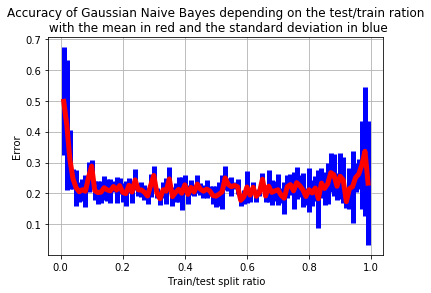

In [144]:
#plt.plot(n_iterations, mus)
plt.xlabel('Train/test split ratio')
plt.ylabel('Error')
#plt.xscale(value = 'log')
plt.errorbar(split_ratio, error, stds, color = 'red', ecolor = 'blue', linewidth = 5)
plt.grid()
plt.title('Accuracy of Gaussian Naive Bayes depending on the test/train ration\n with the mean in red and the standard deviation in blue')
plt.show()

Note that the error assymptotically goes down when we use more data for trainging until the very end where the test data becomes insufficient. Naive Bayes seems to arrive to the assymptote at ~$0.2$ faster that logistic regression.